# Logistic Regression on Titanic Dataset

**Key Steps:**
1. Data Loading
2. Data Exploration
3. Data Preprocessing
4. Train-Test Split
5. Model Training
6. Model Evaluation
7. Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1️⃣ Load Dataset

In [3]:
np.random.seed(42)

In [4]:
x0 = np.random.randn(100, 2) + np.array([-2, -2])
y0 = np.zeros(100)

In [5]:
x1 = np.random.randn(100, 2) + np.array([2, 2])
y1 = np.ones(100)

In [6]:
X = np.vstack((x0, x1)) 
y = np.hstack((y0, y1))

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def loss(y, y_pred):
    m = y.shape[0]
    return -1/m * np.sum(y*np.log(y_pred+1e-9) + (1-y)*np.log(1-y_pred+1e-9))

In [9]:
def train_logistic_regression(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    X_bias = np.c_[np.ones((m, 1)), X] 
    theta = np.zeros(n + 1)

    for i in range(epochs):
        z = np.dot(X_bias, theta)
        y_pred = sigmoid(z)
        gradient = np.dot(X_bias.T, (y_pred - y)) / m
        theta -= lr * gradient
        
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss(y, y_pred):.4f}")
    
    return theta

In [10]:
theta = train_logistic_regression(X, y, lr=0.1, epochs=1000)
print("Trained weights:", theta)

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.0299
Epoch 200, Loss: 0.0199
Epoch 300, Loss: 0.0161
Epoch 400, Loss: 0.0139
Epoch 500, Loss: 0.0125
Epoch 600, Loss: 0.0114
Epoch 700, Loss: 0.0107
Epoch 800, Loss: 0.0100
Epoch 900, Loss: 0.0095
Trained weights: [0.0621702  1.7956393  2.06074439]


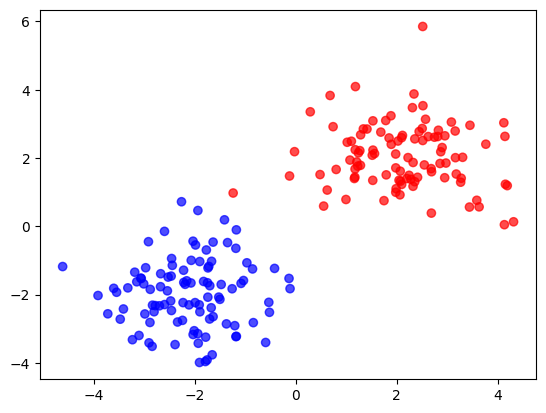

In [11]:
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", alpha=0.7)

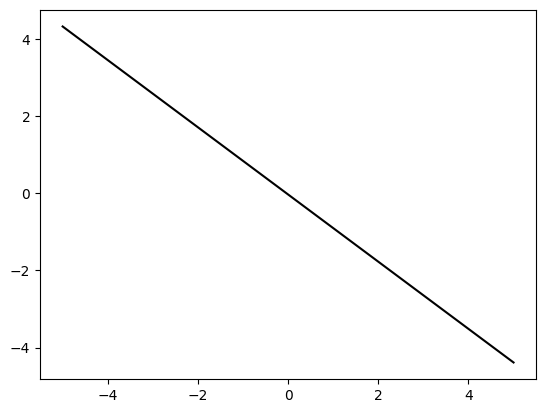

In [12]:
x_values = np.linspace(-5, 5, 100)
y_values = -(theta[0] + theta[1]*x_values) / theta[2] 
plt.plot(x_values, y_values, color="black")

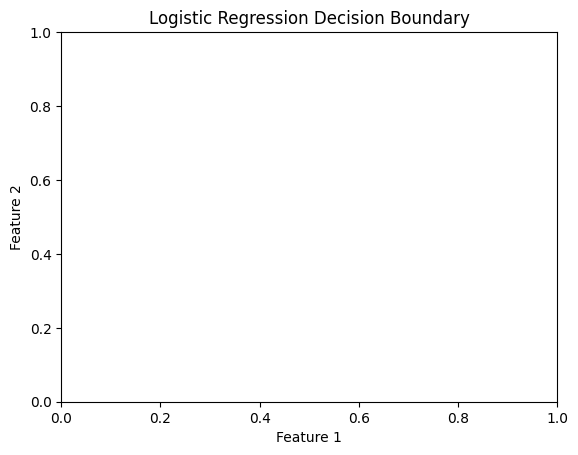

In [13]:
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.show()